# Pair Trading of GLD and GDX

In [1]:
import numpy as np


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import statsmodels.api as sm

In [5]:
df1=pd.read_excel('GLD.xls')
df1

,Date,Open,High,Low,Close,Volume,Adj Close
0,2007-11-30,78.35,78.60,76.98,77.32,9509100,77.32
1,2007-11-29,79.28,79.33,78.28,78.28,9306700,78.28
2,2007-11-28,79.42,79.87,78.76,79.57,9706700,79.57
3,2007-11-27,80.70,80.89,79.81,80.10,7229900,80.10
4,2007-11-26,82.25,82.25,81.13,81.30,7440200,81.30
...,...,...,...,...,...,...,...
759,2004-11-24,44.93,45.05,44.79,45.05,6105100,45.05
760,2004-11-23,44.88,44.92,44.72,44.75,3169200,44.75
761,2004-11-22,44.75,44.97,44.74,44.95,11996000,44.95
762,2004-11-19,44.49,44.92,44.47,44.78,11655300,44.78


In [6]:
df2=pd.read_excel('GDX.xls')
df2

,Date,Open,High,Low,Close,Volume,Adj Close
0,2007-11-30,47.09,47.50,45.70,46.36,2006000,46.36
1,2007-11-29,47.10,48.00,46.76,47.02,1668500,47.02
2,2007-11-28,46.11,48.00,46.06,47.86,3893200,47.86
3,2007-11-27,46.84,46.84,45.74,46.61,2329700,46.61
4,2007-11-26,49.43,49.43,46.85,47.06,1966500,47.06
...,...,...,...,...,...,...,...
380,2006-05-30,39.50,39.72,38.11,38.17,559100,38.06
381,2006-05-26,38.74,38.74,37.77,38.55,269400,38.44
382,2006-05-25,37.18,38.32,36.98,38.32,367000,38.21
383,2006-05-24,37.13,37.57,35.87,36.52,638600,36.41


In [7]:
df=pd.merge(df1, df2, on='Date', suffixes=('_GLD', '_GDX'))
df

,Date,Open_GLD,High_GLD,Low_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,Open_GDX,High_GDX,Low_GDX,Close_GDX,Volume_GDX,Adj Close_GDX
0,2007-11-30,78.35,78.60,76.98,77.32,9509100,77.32,47.09,47.50,45.70,46.36,2006000,46.36
1,2007-11-29,79.28,79.33,78.28,78.28,9306700,78.28,47.10,48.00,46.76,47.02,1668500,47.02
2,2007-11-28,79.42,79.87,78.76,79.57,9706700,79.57,46.11,48.00,46.06,47.86,3893200,47.86
3,2007-11-27,80.70,80.89,79.81,80.10,7229900,80.10,46.84,46.84,45.74,46.61,2329700,46.61
4,2007-11-26,82.25,82.25,81.13,81.30,7440200,81.30,49.43,49.43,46.85,47.06,1966500,47.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2006-05-30,65.20,66.24,65.00,65.11,8240200,65.11,39.50,39.72,38.11,38.17,559100,38.06
381,2006-05-26,65.01,65.10,63.75,65.10,5265900,65.10,38.74,38.74,37.77,38.55,269400,38.44
382,2006-05-25,64.12,64.76,63.76,64.70,6505400,64.70,37.18,38.32,36.98,38.32,367000,38.21
383,2006-05-24,64.83,65.16,63.22,64.06,11065600,64.06,37.13,37.57,35.87,36.52,638600,36.41


In [8]:
df.set_index('Date', inplace=True)
df

,Open_GLD,High_GLD,Low_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,Open_GDX,High_GDX,Low_GDX,Close_GDX,Volume_GDX,Adj Close_GDX
Date,,,,,,,,,,,,
2007-11-30,78.35,78.60,76.98,77.32,9509100,77.32,47.09,47.50,45.70,46.36,2006000,46.36
2007-11-29,79.28,79.33,78.28,78.28,9306700,78.28,47.10,48.00,46.76,47.02,1668500,47.02
2007-11-28,79.42,79.87,78.76,79.57,9706700,79.57,46.11,48.00,46.06,47.86,3893200,47.86
2007-11-27,80.70,80.89,79.81,80.10,7229900,80.10,46.84,46.84,45.74,46.61,2329700,46.61
2007-11-26,82.25,82.25,81.13,81.30,7440200,81.30,49.43,49.43,46.85,47.06,1966500,47.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2006-05-30,65.20,66.24,65.00,65.11,8240200,65.11,39.50,39.72,38.11,38.17,559100,38.06
2006-05-26,65.01,65.10,63.75,65.10,5265900,65.10,38.74,38.74,37.77,38.55,269400,38.44
2006-05-25,64.12,64.76,63.76,64.70,6505400,64.70,37.18,38.32,36.98,38.32,367000,38.21


In [9]:
df.sort_index(inplace=True)
df

,Open_GLD,High_GLD,Low_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,Open_GDX,High_GDX,Low_GDX,Close_GDX,Volume_GDX,Adj Close_GDX
Date,,,,,,,,,,,,
2006-05-23,65.99,67.16,65.91,66.38,10509700,66.38,37.75,39.22,37.75,37.96,620900,37.85
2006-05-24,64.83,65.16,63.22,64.06,11065600,64.06,37.13,37.57,35.87,36.52,638600,36.41
2006-05-25,64.12,64.76,63.76,64.70,6505400,64.70,37.18,38.32,36.98,38.32,367000,38.21
2006-05-26,65.01,65.10,63.75,65.10,5265900,65.10,38.74,38.74,37.77,38.55,269400,38.44
2006-05-30,65.20,66.24,65.00,65.11,8240200,65.11,39.50,39.72,38.11,38.17,559100,38.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2007-11-26,82.25,82.25,81.13,81.30,7440200,81.30,49.43,49.43,46.85,47.06,1966500,47.06
2007-11-27,80.70,80.89,79.81,80.10,7229900,80.10,46.84,46.84,45.74,46.61,2329700,46.61
2007-11-28,79.42,79.87,78.76,79.57,9706700,79.57,46.11,48.00,46.06,47.86,3893200,47.86


In [10]:
df.shape

(385, 12)

In [11]:
trainset=np.arange(0, 252)
trainset

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [12]:
testset=np.arange(trainset.shape[0], df.shape[0])
testset

array([252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
       278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
       291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
       304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
       317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
       330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
       343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,
       356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
       369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381,
       382, 383, 384])

## Determine hedge ratio on trainset

In [13]:
model=sm.OLS(df.loc[:, 'Adj Close_GLD'].iloc[trainset], df.loc[:, 'Adj Close_GDX'].iloc[trainset])
model

In [14]:
df.loc[:, 'Adj Close_GLD']


Date
2006-05-23    66.38
2006-05-24    64.06
2006-05-25    64.70
2006-05-26    65.10
2006-05-30    65.11
              ...  
2007-11-26    81.30
2007-11-27    80.10
2007-11-28    79.57
2007-11-29    78.28
2007-11-30    77.32
Name: Adj Close_GLD, Length: 385, dtype: float64

In [15]:
results=model.fit()

In [16]:
hedgeRatio=results.params
hedgeRatio

Adj Close_GDX    1.631009
dtype: float64

In [17]:
hedgeRatio

Adj Close_GDX    1.631009
dtype: float64

##  spread = GLD - hedgeRatio*GDX

In [18]:
spread=df.loc[:, 'Adj Close_GLD']-hedgeRatio[0]*df.loc[:, 'Adj Close_GDX']
spread

/tmp/ipykernel_115814/1314746972.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread=df.loc[:, 'Adj Close_GLD']-hedgeRatio[0]*df.loc[:, 'Adj Close_GDX']


Date
2006-05-23    4.646311
2006-05-24    4.674964
2006-05-25    2.379148
2006-05-26    2.404016
2006-05-30    3.033799
                ...   
2007-11-26    4.544719
2007-11-27    4.078673
2007-11-28    1.509911
2007-11-29    1.589959
2007-11-30    1.706425
Length: 385, dtype: float64

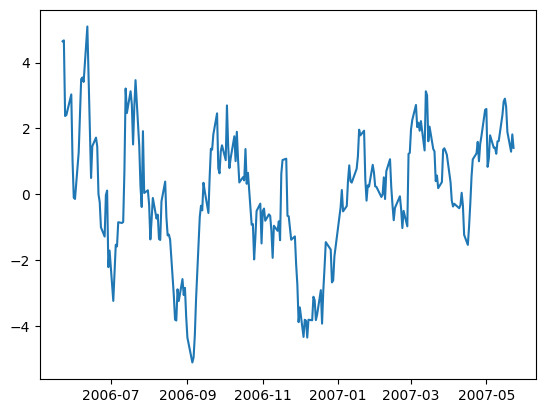

In [19]:
plt.plot(spread.iloc[trainset])

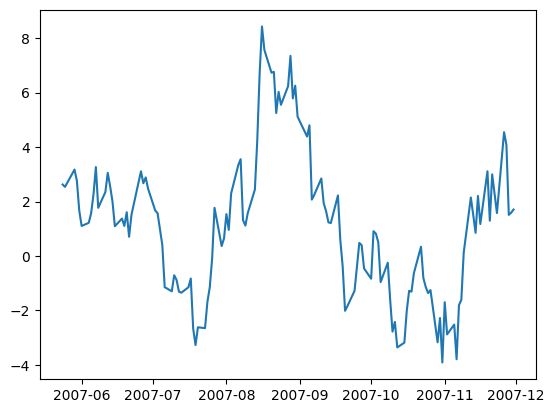

In [20]:
plt.plot(spread.iloc[testset])

In [21]:
spreadMean=np.mean(spread.iloc[trainset])

In [22]:
spreadMean

np.float64(0.05219623850036005)

In [23]:
spreadStd=np.std(spread.iloc[trainset])

In [24]:
spreadStd

np.float64(1.944860873496509)

In [25]:
df['zscore']=(spread-spreadMean)/spreadStd

In [26]:
df['positions_GLD_Long']=0

In [27]:
df['positions_GDX_Long']=0

In [28]:
df['positions_GLD_Short']=0

In [29]:
df['positions_GDX_Short']=0

In [30]:
df.loc[df.zscore>=2, ('positions_GLD_Short', 'positions_GDX_Short')]=[-1, 1] # Short spread

In [31]:
df.loc[df.zscore<=-2, ('positions_GLD_Long', 'positions_GDX_Long')]=[1, -1] # Buy spread

In [32]:
df.loc[df.zscore<=1, ('positions_GLD_Short', 'positions_GDX_Short')]=0 # Exit short spread

In [33]:
df.loc[df.zscore>=-1, ('positions_GLD_Long', 'positions_GDX_Long')]=0 # Exit long spread

In [34]:
df.fillna(method='ffill', inplace=True) # ensure existing positions are carried forward unless there is an exit signal

/tmp/ipykernel_115814/1143388214.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True) # ensure existing positions are carried forward unless there is an exit signal


In [35]:
positions_Long=df.loc[:, ('positions_GLD_Long', 'positions_GDX_Long')]

In [36]:
positions_Short=df.loc[:, ('positions_GLD_Short', 'positions_GDX_Short')]

In [37]:
positions=np.array(positions_Long)+np.array(positions_Short)

In [38]:
positions=pd.DataFrame(positions)

In [39]:
dailyret=df.loc[:, ('Adj Close_GLD', 'Adj Close_GDX')].pct_change()

In [40]:
pnl=(np.array(positions.shift())*np.array(dailyret)).sum(axis=1)

In [41]:
sharpeTrainset=np.sqrt(252)*np.mean(pnl[trainset[1:]])/np.std(pnl[trainset[1:]])

In [42]:
sharpeTrainset

np.float64(1.9182982282569077)

In [43]:
sharpeTestset=np.sqrt(252)*np.mean(pnl[testset])/np.std(pnl[testset])

In [44]:
sharpeTestset

np.float64(1.494313761833427)

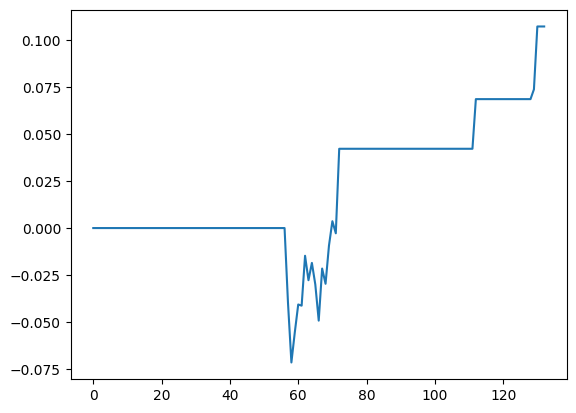

In [45]:
plt.plot(np.cumsum(pnl[testset]))

In [46]:
positions.to_pickle('example3_6_positions')